In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Load the data and explore it!

In [149]:
df = pd.read_csv(str(Path(r'./Data/BS_training.csv')))

In [150]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [151]:
len(df)

300000

In [152]:
df=df.sample(frac=5000/300000.0)

In [153]:
len(df)

5000

In [154]:
df['Stock Price'] = df['Stock Price'] / df['Strike Price']
df['Call Price'] = df['Call Price'] / df['Strike Price']
df['Strike Price'] = df['Strike Price'] / df['Strike Price']

In [155]:
df.head()

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
73613,1.308448,1.0,0.832877,0.007827,0.417888,0.082978,0.410867
111418,1.163198,1.0,0.438356,0.000803,0.344547,0.077025,0.224487
110618,0.790963,1.0,1.402740,0.021270,0.406190,0.068743,0.098486
176114,1.013650,1.0,1.016438,0.018170,0.736378,0.032890,0.298235
270737,1.086830,1.0,2.293151,0.021751,0.460504,0.045993,0.335664


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 73613 to 242336
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock Price   5000 non-null   float64
 1   Strike Price  5000 non-null   float64
 2   Maturity      5000 non-null   float64
 3   Dividends     5000 non-null   float64
 4   Volatility    5000 non-null   float64
 5   Risk-free     5000 non-null   float64
 6   Call Price    5000 non-null   float64
dtypes: float64(7)
memory usage: 312.5 KB


In [157]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Stock Price,5000.0,1.034404,0.186794,7.693625e-01,0.870590,1.002223,1.178260,1.428463
Strike Price,5000.0,1.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
Maturity,5000.0,1.506417,0.869603,2.739726e-03,0.772603,1.501370,2.279452,2.997260
Dividends,5000.0,0.015079,0.008734,5.462480e-06,0.007552,0.015122,0.022730,0.029996
Volatility,5000.0,0.470069,0.246202,5.020371e-02,0.253302,0.475831,0.681573,0.899977
Risk-free,5000.0,0.055096,0.025844,1.000771e-02,0.032833,0.055958,0.076829,0.099988
Call Price,5000.0,0.268374,0.180248,2.525464e-47,0.120716,0.255569,0.391765,0.859765


We dont do any kind of EDA here, since the data is simulated and regular. Nothing to explore here!

### Split the data into test-train

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X = df.drop('Call Price', axis=1).values
y = df['Call Price'].values

In [160]:
X.shape, y.shape

((5000, 6), (5000,))

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

### Scale the data

In [162]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
scaler = MinMaxScaler()

In [164]:
#scaler.fit(X_train)

In [165]:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [167]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(6,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse')

In [168]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_31 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_32 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 11        
Total params: 823
Trainable params: 823
Non-trainable params: 0
_________________________________________________________________


In [170]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [172]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, 
          callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 4000 samples, validate on 1000 samples
Epoch 1/500
4000/4000 [==============================] - 0s 19us/sample - loss: 1.0385e-04 - val_loss: 9.8207e-05
Epoch 2/500
4000/4000 [==============================] - 0s 18us/sample - loss: 1.1429e-04 - val_loss: 1.0099e-04
Epoch 3/500
4000/4000 [==============================] - 0s 18us/sample - loss: 1.1244e-04 - val_loss: 3.1686e-04
Epoch 4/500
4000/4000 [==============================] - 0s 18us/sample - loss: 1.2453e-04 - val_loss: 1.3760e-04
Epoch 5/500
4000/4000 [==============================] - 0s 18us/sample - loss: 1.0238e-04 - val_loss: 1.2158e-04
Epoch 6/500
4000/4000 [==============================] - 0s 17us/sample - loss: 9.5799e-05 - val_loss: 1.1159e-04
Epoch 7/500
4000/4000 [==============================] - 0s 18us/sample - loss: 1.0327e-04 - val_loss: 9.4809e-05
Epoch 8/500
4000/4000 [==============================] - 0s 17us/sample - loss: 9.9070e-05 - val_loss: 2.6893e-04
Epoch 9/500
4000/4000 [=================

Epoch 72/500
4000/4000 [==============================] - 0s 17us/sample - loss: 5.9820e-05 - val_loss: 7.9446e-05
Epoch 73/500
4000/4000 [==============================] - 0s 16us/sample - loss: 6.4217e-05 - val_loss: 7.1581e-05
Epoch 74/500
4000/4000 [==============================] - 0s 18us/sample - loss: 6.0370e-05 - val_loss: 5.9084e-05
Epoch 75/500
4000/4000 [==============================] - 0s 19us/sample - loss: 6.6486e-05 - val_loss: 6.8283e-05
Epoch 76/500
4000/4000 [==============================] - 0s 18us/sample - loss: 5.6656e-05 - val_loss: 5.3691e-05
Epoch 77/500
4000/4000 [==============================] - 0s 17us/sample - loss: 6.2340e-05 - val_loss: 7.5482e-05
Epoch 78/500
4000/4000 [==============================] - 0s 17us/sample - loss: 8.4812e-05 - val_loss: 1.3659e-04
Epoch 79/500
4000/4000 [==============================] - 0s 16us/sample - loss: 6.9138e-05 - val_loss: 6.0341e-05
Epoch 80/500
4000/4000 [==============================] - 0s 17us/sample - loss:

Epoch 143/500
4000/4000 [==============================] - 0s 17us/sample - loss: 5.0479e-05 - val_loss: 4.4369e-05
Epoch 144/500
4000/4000 [==============================] - 0s 18us/sample - loss: 4.4484e-05 - val_loss: 5.2349e-05
Epoch 145/500
4000/4000 [==============================] - 0s 17us/sample - loss: 4.9396e-05 - val_loss: 4.6081e-05
Epoch 146/500
4000/4000 [==============================] - 0s 18us/sample - loss: 4.5349e-05 - val_loss: 4.3910e-05
Epoch 147/500
4000/4000 [==============================] - 0s 17us/sample - loss: 4.4112e-05 - val_loss: 3.9986e-05
Epoch 148/500
4000/4000 [==============================] - 0s 17us/sample - loss: 5.0487e-05 - val_loss: 4.1530e-05
Epoch 149/500
4000/4000 [==============================] - 0s 17us/sample - loss: 5.4245e-05 - val_loss: 4.3022e-05
Epoch 150/500
4000/4000 [==============================] - 0s 16us/sample - loss: 4.5822e-05 - val_loss: 4.3414e-05
Epoch 151/500
4000/4000 [==============================] - 0s 16us/sampl

4000/4000 [==============================] - 0s 17us/sample - loss: 4.3807e-05 - val_loss: 6.4919e-05


### Evaluating the model

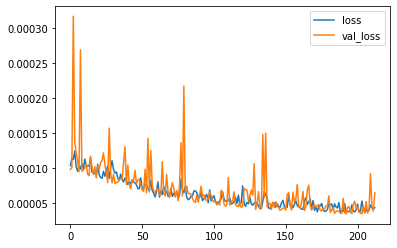

In [173]:
pd.DataFrame(model.history.history).plot()

In [174]:
y_pred_train = model.predict(x=X_train)

In [175]:
y_train_results = pd.concat([pd.Series(y_pred_train.reshape(y_train.shape), name='y_pred'), 
                             pd.Series(y_train, name='y_true')], 
                            axis=1)

In [176]:
y_train_results.head()

,y_pred,y_true
0,0.288149,0.287285
1,0.239736,0.232968
2,0.545119,0.534632
3,0.119372,0.117641
4,0.376625,0.376031


In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [178]:
y_predicted = model.predict(X_test).reshape(y_test.shape)

In [179]:
mean_absolute_error(y_true=y_test, y_pred=y_predicted)

0.006123639347563513

In [180]:
mean_squared_error(y_true=y_test, y_pred=y_predicted)

6.491872121428108e-05

In [181]:
y_df = pd.concat([pd.Series(y_test, name='y_true'), pd.Series(y_predicted, name='y_pred')], axis=1)

In [182]:
y_df

,y_true,y_pred
0,0.530321,0.550645
1,0.419656,0.433881
2,0.038516,0.041744
3,0.235395,0.237599
4,0.514771,0.520741
...,...,...
995,0.129675,0.135424
996,0.284575,0.292139
997,0.337983,0.345730
998,0.233335,0.236551


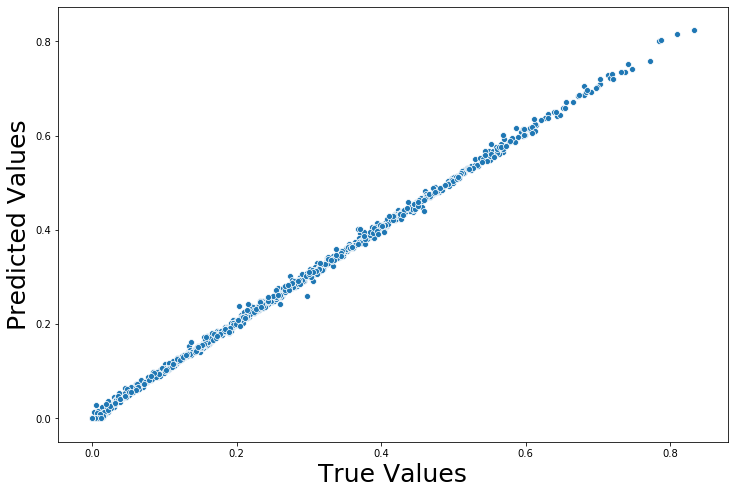

In [183]:
plt.figure(figsize=(12,8))
a = sns.scatterplot(y_test, y_predicted, legend='full')
a.set_xlabel('True Values', fontsize=25)
_ = a.set_ylabel('Predicted Values', fontsize=25)

Text(0.5, 0, 'Error(True-Predicted)')

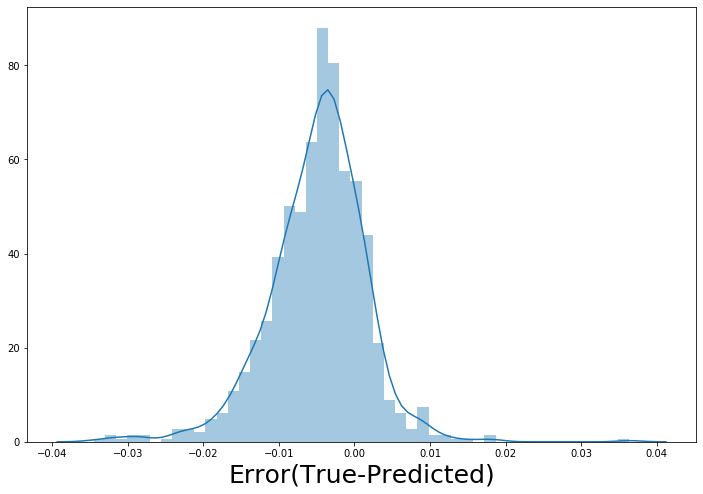

In [184]:
plt.figure(figsize=(12,8))
b = sns.distplot(pd.Series(y_test-y_predicted, name="Error(True-Predicted)"))
b.set_xlabel('Error(True-Predicted)', fontsize=25)
# _ = b.set_ylabel('# of Instances', fontsize=25)

### Save the model

In [165]:
model.save(r'C:\Ankit\PythonProjects\hackathon\DeepLearning\5ksamples.h5', save_format='tf')

In [167]:
from tensorflow.keras.models import load_model

In [168]:
later_model = load_model(r'C:\Ankit\PythonProjects\hackathon\DeepLearning\5ksamples.h5', compile=False)

In [33]:
later_model.predict(X_test).reshape(y_test.shape)

array([0.26783845, 0.3217547 , 0.00570326, ..., 0.6660765 , 0.5195066 ,
       0.4476939 ], dtype=float32)

In [34]:
y_predicted

array([0.26783845, 0.3217547 , 0.00570326, ..., 0.6660765 , 0.5195066 ,
       0.4476939 ], dtype=float32)

In [35]:
X_test.shape

(60000, 6)

In [36]:
X_test[0].shape

(6,)

In [37]:
X_test[0:1]

array([[0.7821705 , 1.        , 2.52328767, 0.00792332, 0.67824267,
        0.01849439]])

In [38]:
df.head()

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,1.062237,1.0,1.093151,0.005674,0.862692,0.058898,0.408642
1,1.076500,1.0,0.843836,0.020428,0.759562,0.080634,0.337843
2,0.849812,1.0,1.326027,0.019181,0.606436,0.042031,0.187719
3,0.904815,1.0,0.791781,0.028475,0.572696,0.036566,0.146312
4,0.859547,1.0,0.501370,0.009074,0.090578,0.044426,0.000397


In [39]:
later_model.predict(np.array([1.062237, 1.0, 1.093151, 0.005674, 0.862692, 0.058898]).reshape((1,6)))

array([[0.40613532]], dtype=float32)

In [46]:
later_model.predict(np.array([1.0, 1.0, 1, 0.0, 0.2, 0.0]).reshape((1,6)))

array([[0.0799723]], dtype=float32)

In [50]:
df[(df['Stock Price'] > 0.49) & (df['Stock Price'] < 0.51)]

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price


In [56]:
df['Stock Price'].describe()

count    300000.000000
mean          1.031697
std           0.185779
min           0.769231
25%           0.868780
50%           0.999826
75%           1.176731
max           1.428564
Name: Stock Price, dtype: float64